### Step 0: Import libraries

In [16]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


### Step 1: Load Dataset & Preview

In [17]:
# 1a. dataset path
data_path = '../data/raw/laptop_prices.csv'
df = pd.read_csv(data_path, encoding="ISO-8859-1")

In [18]:
# 1b. preview dataset
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [19]:
# 1c. dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None


In [20]:
# 1d. check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


### Step 2: Exploratory Data Analysis (EDA)

In [21]:
# 2a. Statistical summary
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


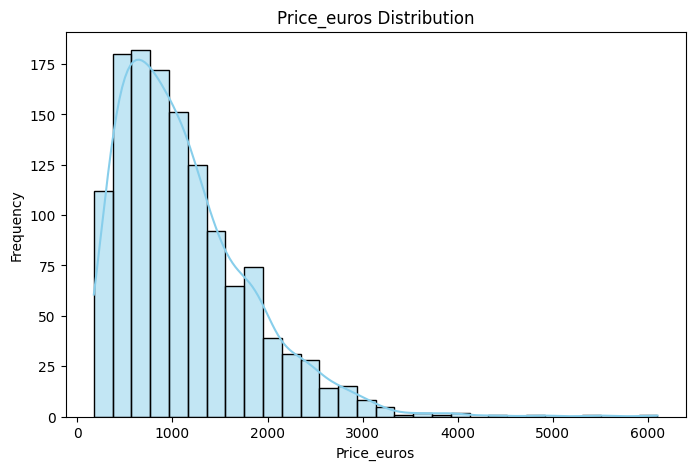

In [22]:
# 2b. Visualize Target Distribution
target_column = 'Price_euros'
plt.figure(figsize=(8, 5))
sns.histplot(df[target_column], bins=30, kde=True, color='skyblue')
plt.title(f"{target_column} Distribution")
plt.xlabel(target_column)
plt.ylabel("Frequency")
plt.show()

In [23]:
# 2c. Correlation Heatmap (numeric features only)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Apple'

<Figure size 1000x800 with 0 Axes>

### Step 3: Data Preprocessing

In [ ]:
# 3a. Select feature columns
feature_columns = ['RAM', 'Storage', 'Weight']
X = df[feature_columns]
y = df[target_column]

In [ ]:
# 3b. Split the dataset (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Model Training

In [ ]:
# 4a: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# 4b: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### Step 5: Model Evaluation

In [ ]:
# 5a. Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n======== {model_name} Performance ======")
    print(f"Mean Absolute Error (MAE):", round(mean_absolute_error(y_true, y_pred), 2))
    print(f"Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print(f"R-squared (R2 ): ", round(r2_score(y_true, y_pred), 2))

In [ ]:
# 5b. Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

In [ ]:
# 5c. Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

### Step 6: Feature Importance (Random Forest)

In [ ]:
# 6a: Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
display(feature_importance_df)

In [ ]:
# 6b: Visualize Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Step 7: Actionable Recommendations

In [ ]:
# Example: recommend items under certain budgets.
budget = 1000  # Example budget
recommended_items = df[df[target_column] <= budget]
print(f"\nItems recommended under budget of {budget}:")
display(recommended_items[['Brand', 'Model', target_column]])

### Step 8: Save the Best Model

In [ ]:
# Choose the best performing model so far.
best_model = rf_model if r2_score(y_test, y_pred_rf) > r2_score(y_test, y_pred_lr) else lr_model

### Step 9: Save the Cleaned Dataset

In [ ]:
model_filename = f'../models/best_model_{target_column}.pkl'
joblib.dump(best_model, model_filename)
print(f"\nBest model saved as {model_filename}.")